In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

In [3]:
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

In [4]:
def black_scholes_greeks(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    rho = K * T * np.exp(-r * T) * norm.cdf(d2)
    return delta, gamma, theta, vega, rho

In [5]:
def monte_carlo_simulation(S0, K, T, r, sigma, num_simulations=10000):
    S = np.zeros(num_simulations)
    for i in range(num_simulations):
        ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.normal())
        S[i] = ST
    call_payoffs = np.maximum(S - K, 0)
    put_payoffs = np.maximum(K - S, 0)
    call_price = np.exp(-r * T) * np.mean(call_payoffs)
    put_price = np.exp(-r * T) * np.mean(put_payoffs)
    return call_price, put_price

In [6]:
def implied_volatility(option_price, S, K, T, r, option_type='call'):
    def objective_function(sigma):
        if option_type == 'call':
            return (black_scholes_call(S, K, T, r, sigma) - option_price) ** 2
        else:
            return (black_scholes_put(S, K, T, r, sigma) - option_price) ** 2

    result = minimize(objective_function, x0=0.2, bounds=[(0.01, 2)])
    return result.x[0]

In [7]:
# Parameters
current_asset_price = 100.00  # Current asset price
strike_price = 100.00  # Strike price
time_to_maturity = 1.00  # Time to maturity in years
volatility = 0.20  # Volatility (σ)
risk_free_rate = 0.05  # Risk-free interest rate

min_spot_price = 80.05  # Min spot price
max_spot_price = 120.07  # Max spot price
min_volatility = 0.01  # Min volatility for heatmap
max_volatility = 1.00  # Max volatility for heatmap

In [8]:
# Generate a range of underlying asset prices and strike prices
S_values = np.linspace(min_spot_price, max_spot_price, 100)
K_values = np.linspace(min_spot_price, max_spot_price, 100)

# Initialize matrices to hold call and put prices
call_prices = np.zeros((len(S_values), len(K_values)))
put_prices = np.zeros((len(S_values), len(K_values)))

In [9]:
# Calculate prices
for i, S in enumerate(S_values):
    for j, K in enumerate(K_values):
        call_prices[i, j] = black_scholes_call(S, K, time_to_maturity, risk_free_rate, volatility)
        put_prices[i, j] = black_scholes_put(S, K, time_to_maturity, risk_free_rate, volatility)

# Calculate and print the call and put prices for the given current asset price and strike price
call_value = black_scholes_call(current_asset_price, strike_price, time_to_maturity, risk_free_rate, volatility)
put_value = black_scholes_put(current_asset_price, strike_price, time_to_maturity, risk_free_rate, volatility)

In [10]:
print(f"Call Price for Current Asset Price {current_asset_price} and Strike Price {strike_price}: {call_value:.2f}")
print(f"Put Price for Current Asset Price {current_asset_price} and Strike Price {strike_price}: {put_value:.2f}")

Call Price for Current Asset Price 100.0 and Strike Price 100.0: 10.45
Put Price for Current Asset Price 100.0 and Strike Price 100.0: 5.57


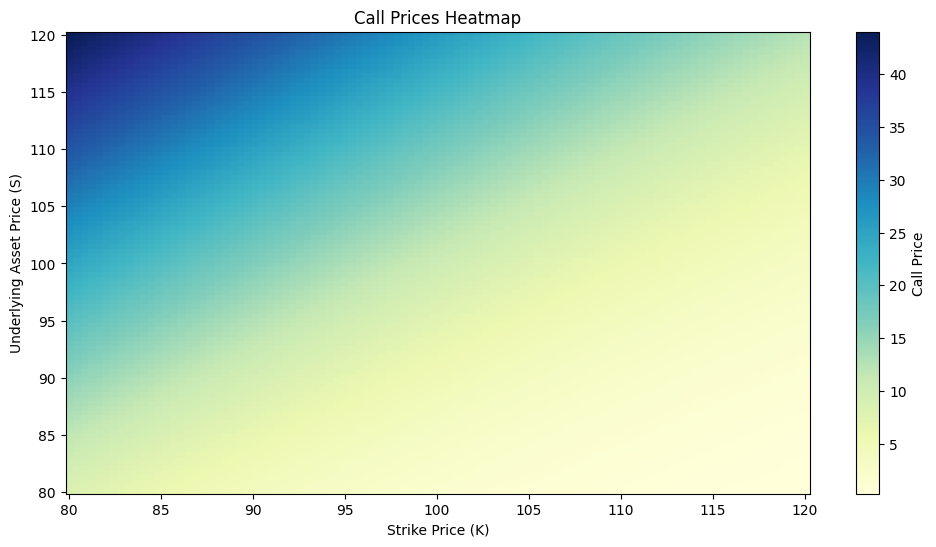

In [11]:
# Create heatmap for call prices with squares using matplotlib
plt.figure(figsize=(12, 6))
plt.pcolormesh(K_values, S_values, call_prices, cmap='YlGnBu', shading='auto')
plt.colorbar(label='Call Price')
plt.title('Call Prices Heatmap')
plt.xlabel('Strike Price (K)')
plt.ylabel('Underlying Asset Price (S)')
plt.show()

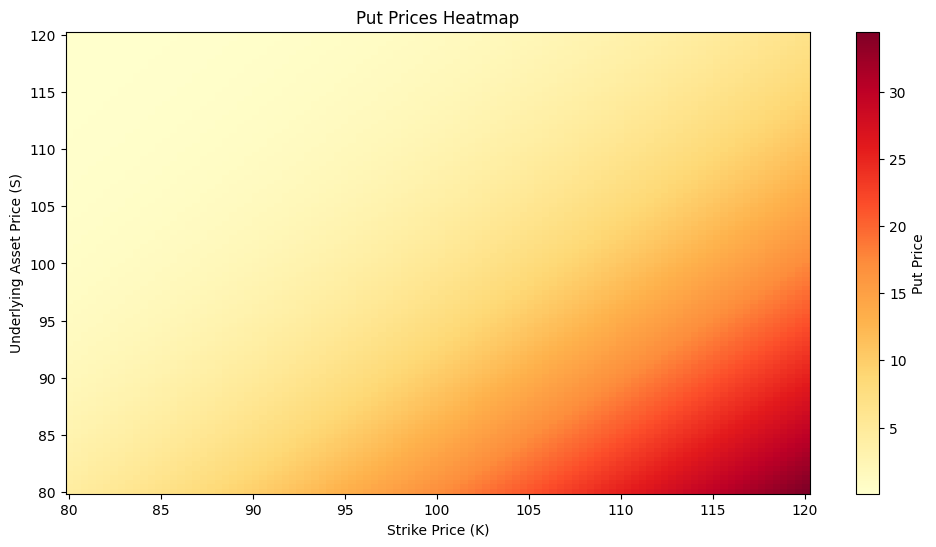

In [12]:
# Create heatmap for put prices with squares using matplotlib
plt.figure(figsize=(12, 6))
plt.pcolormesh(K_values, S_values, put_prices, cmap='YlOrRd', shading='auto')
plt.colorbar(label='Put Price')
plt.title('Put Prices Heatmap')
plt.xlabel('Strike Price (K)')
plt.ylabel('Underlying Asset Price (S)')
plt.show()

In [13]:
# Calculate Greeks
delta_matrix = np.zeros((len(S_values), len(K_values)))
gamma_matrix = np.zeros((len(S_values), len(K_values)))
theta_matrix = np.zeros((len(S_values), len(K_values)))
vega_matrix = np.zeros((len(S_values), len(K_values)))
rho_matrix = np.zeros((len(S_values), len(K_values)))

In [14]:
for i, S in enumerate(S_values):
    for j, K in enumerate(K_values):
        delta, gamma, theta, vega, rho = black_scholes_greeks(S, K, time_to_maturity, risk_free_rate, volatility)
        delta_matrix[i, j] = delta
        gamma_matrix[i, j] = gamma
        theta_matrix[i, j] = theta
        vega_matrix[i, j] = vega
        rho_matrix[i, j] = rho

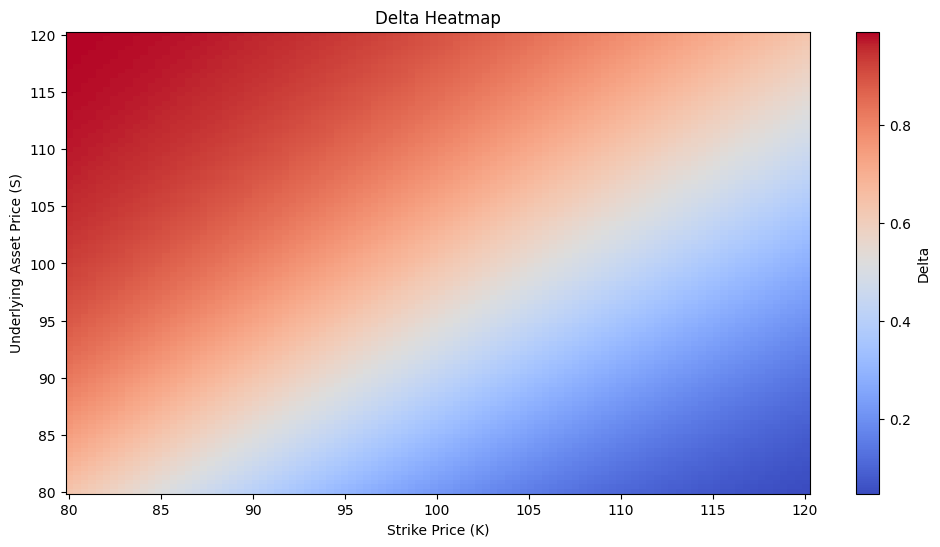

In [15]:
# Create heatmaps for Greeks
plt.figure(figsize=(12, 6))
plt.pcolormesh(K_values, S_values, delta_matrix, cmap='coolwarm', shading='auto')
plt.colorbar(label='Delta')
plt.title('Delta Heatmap')
plt.xlabel('Strike Price (K)')
plt.ylabel('Underlying Asset Price (S)')
plt.show()

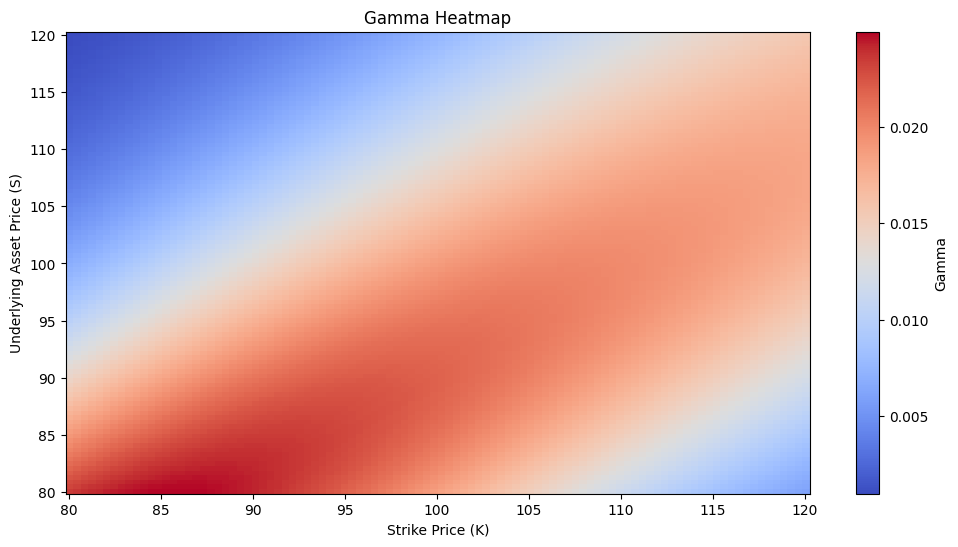

In [16]:
plt.figure(figsize=(12, 6))
plt.pcolormesh(K_values, S_values, gamma_matrix, cmap='coolwarm', shading='auto')
plt.colorbar(label='Gamma')
plt.title('Gamma Heatmap')
plt.xlabel('Strike Price (K)')
plt.ylabel('Underlying Asset Price (S)')
plt.show()

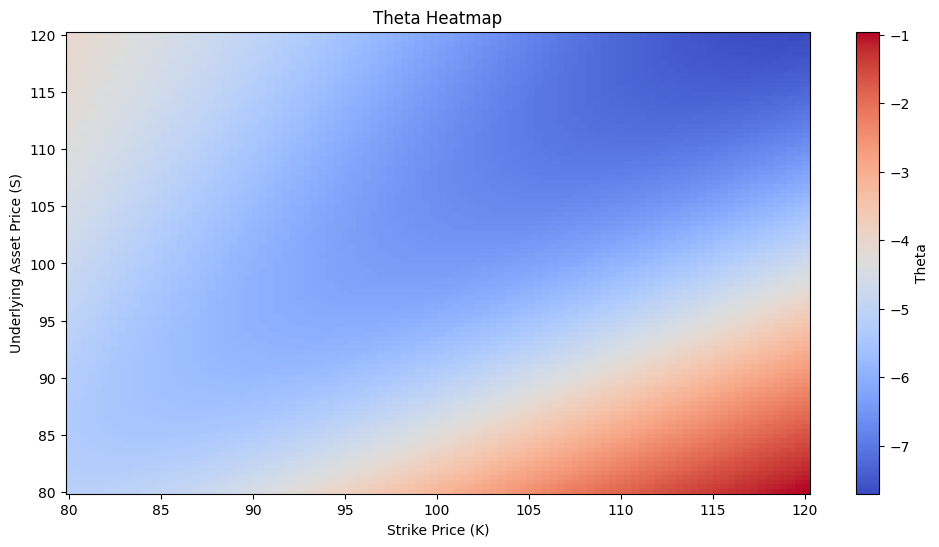

In [17]:
plt.figure(figsize=(12, 6))
plt.pcolormesh(K_values, S_values, theta_matrix, cmap='coolwarm', shading='auto')
plt.colorbar(label='Theta')
plt.title('Theta Heatmap')
plt.xlabel('Strike Price (K)')
plt.ylabel('Underlying Asset Price (S)')
plt.show()

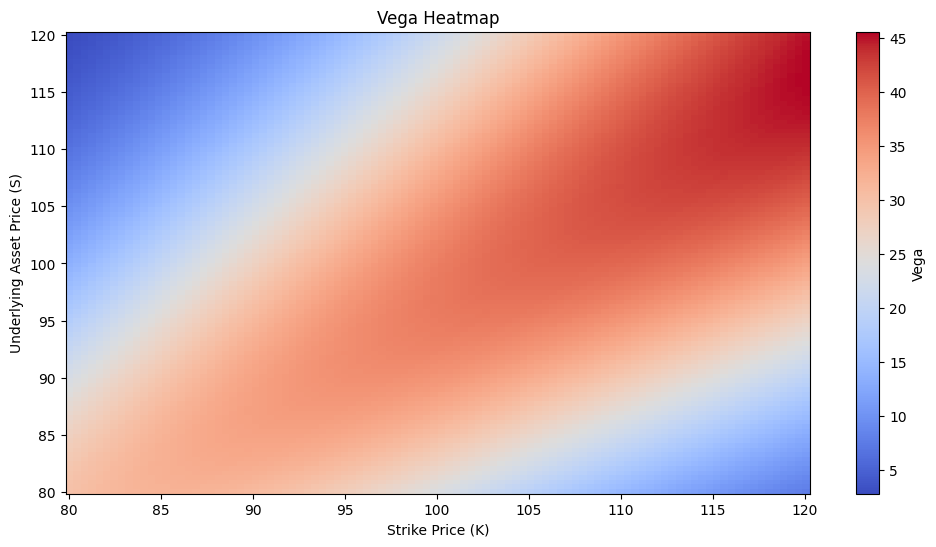

In [18]:
plt.figure(figsize=(12, 6))
plt.pcolormesh(K_values, S_values, vega_matrix, cmap='coolwarm', shading='auto')
plt.colorbar(label='Vega')
plt.title('Vega Heatmap')
plt.xlabel('Strike Price (K)')
plt.ylabel('Underlying Asset Price (S)')
plt.show()

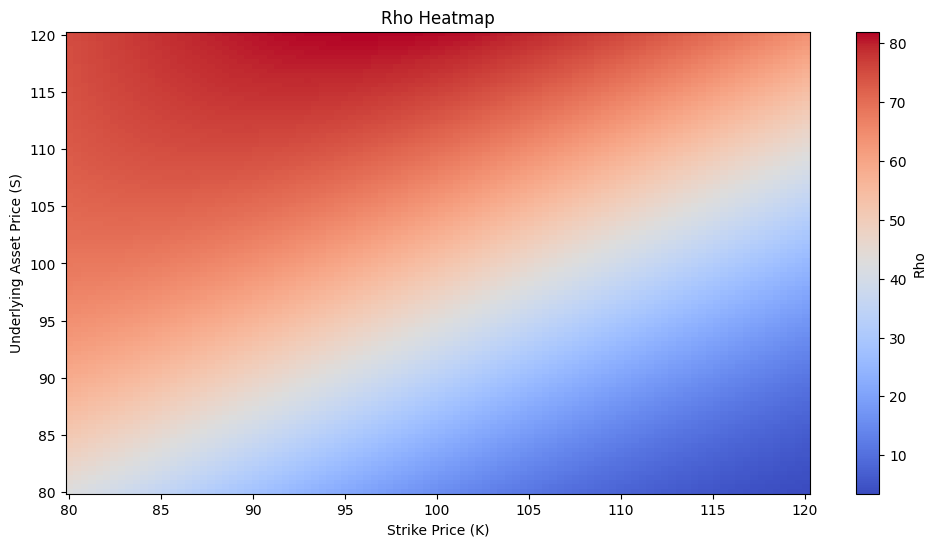

In [19]:
plt.figure(figsize=(12, 6))
plt.pcolormesh(K_values, S_values, rho_matrix, cmap='coolwarm', shading='auto')
plt.colorbar(label='Rho')
plt.title('Rho Heatmap')
plt.xlabel('Strike Price (K)')
plt.ylabel('Underlying Asset Price (S)')
plt.show()

In [20]:
volatility_range = np.linspace(min_volatility, max_volatility, 10)
call_prices_vol = np.zeros(len(volatility_range))
put_prices_vol = np.zeros(len(volatility_range))

In [21]:
for idx, vol in enumerate(volatility_range):
    call_prices_vol[idx] = black_scholes_call(current_asset_price, strike_price, time_to_maturity, risk_free_rate, vol)
    put_prices_vol[idx] = black_scholes_put(current_asset_price, strike_price, time_to_maturity, risk_free_rate, vol)

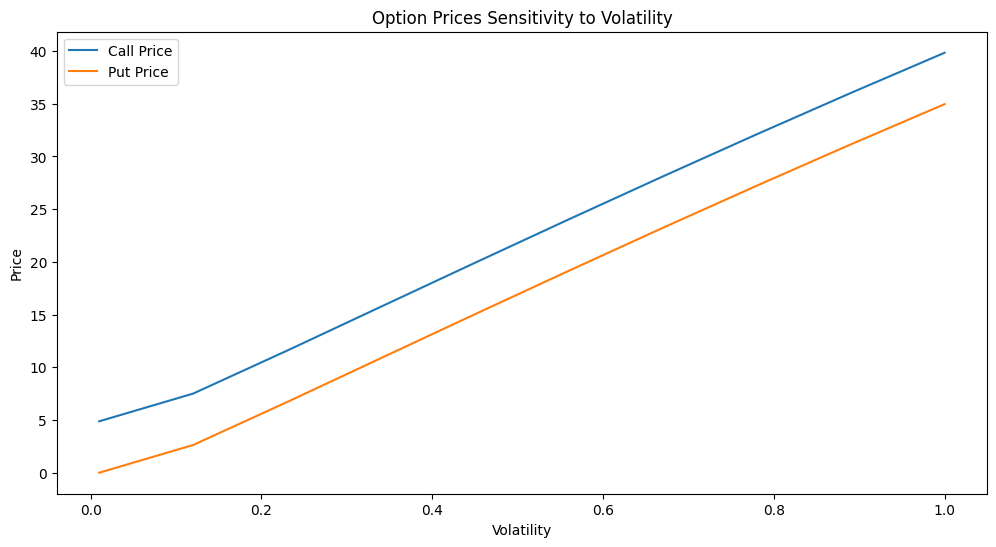

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(volatility_range, call_prices_vol, label='Call Price')
plt.plot(volatility_range, put_prices_vol, label='Put Price')
plt.title('Option Prices Sensitivity to Volatility')
plt.xlabel('Volatility')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
mc_call_price, mc_put_price = monte_carlo_simulation(current_asset_price, strike_price, time_to_maturity, risk_free_rate, volatility)
bs_call_price = black_scholes_call(current_asset_price, strike_price, time_to_maturity, risk_free_rate, volatility)
bs_put_price = black_scholes_put(current_asset_price, strike_price, time_to_maturity, risk_free_rate, volatility)

In [24]:
print(f"Monte Carlo Call Price: {mc_call_price:.2f}")
print(f"Black-Scholes Call Price: {bs_call_price:.2f}")
print(f"Monte Carlo Put Price: {mc_put_price:.2f}")
print(f"Black-Scholes Put Price: {bs_put_price:.2f}")

Monte Carlo Call Price: 10.39
Black-Scholes Call Price: 10.45
Monte Carlo Put Price: 5.66
Black-Scholes Put Price: 5.57
